# Flare 2021/10/28

In [55]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [56]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:\solar flares\data\\2021-10-28\\fits\\nb_8542_2021-10-28T153150_153150=0-99_stokes_corrected_im.fits"
maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_15032\2150097153.py:4: SyntaxWarning: invalid escape sequence '\s'
  folder_path = "E:\solar flares\data\\2021-10-28\\fits\\nb_8542_2021-10-28T153150_153150=0-99_stokes_corrected_im.fits"


In [57]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Mon Sep 16 18:53:53 2024      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1382 / Number of positions along axis 1               
NAXIS2  =                 1382 / Number of positions along axis 2               
NAXIS3  =                   15 / Number of positions along axis 3               
NAXIS4  =                    4 / Number of positions along axis 4               
NAXIS5  =                  100 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
TIMESYS = 'UTC     '           /                                                
DATE    = '2024-09-19T15:14:19' / Creation UTC date of FITS header              
VAR_KEYS= 'VAR-EXT-PRPARA1;PRPARA1,VAR-EXT-PRREF1;PRREF1,VAR-EXT-DATE-BEG;DATE&'
CONTINUE  '-BEG,VAR-EXT-DATE

In [58]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io[:10]):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0][1:10])
    tlist2 = io[6].data
    pos = io[1].data

print(pos, '\n', tlist2)
wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstFe.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002188212A5A0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000218B6865EE0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000218B6867290>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000218B6864350>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000218B6864E90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000218801F6AE0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880320AA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880320050>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880320E30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880322090>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880321FA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880132090>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000218801301A0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021880133B90>, <astropy.io.fits.hdu.ta

In [59]:
pos[0][0][:,:,0,0,2][0]

array([854.11999843, 854.13999843, 854.15499843, 854.16999843,
       854.17999843, 854.18999843, 854.19999843, 854.20999843,
       854.21999843, 854.22999843, 854.23999843, 854.24999843,
       854.26499843, 854.27999843, 854.29999843], dtype='>f8')

In [60]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('40.01611',
 array(['2021-10-28T15:31:56.86121', '2021-10-28T15:32:18.45243',
        '2021-10-28T15:32:40.01611', '2021-10-28T15:33:01.57978',
        '2021-10-28T15:33:23.14347', '2021-10-28T15:33:44.70776',
        '2021-10-28T15:34:06.27222', '2021-10-28T15:34:27.83550',
        '2021-10-28T15:34:49.39829', '2021-10-28T15:35:10.96150',
        '2021-10-28T15:35:32.55235', '2021-10-28T15:35:54.14375',
        '2021-10-28T15:36:15.73559', '2021-10-28T15:36:37.29914',
        '2021-10-28T15:36:58.86366', '2021-10-28T15:37:20.42909',
        '2021-10-28T15:37:41.99421', '2021-10-28T15:38:03.55890',
        '2021-10-28T15:38:25.12374', '2021-10-28T15:38:46.68846',
        '2021-10-28T15:39:08.28103', '2021-10-28T15:39:29.87252',
        '2021-10-28T15:39:51.46414', '2021-10-28T15:40:13.05566',
        '2021-10-28T15:40:34.61961', '2021-10-28T15:40:56.18285',
        '2021-10-28T15:41:17.74659', '2021-10-28T15:41:39.31217',
        '2021-10-28T15:42:00.87728', '2021-10-28T15:42:22.44116

In [61]:
time_list = [t[11:] for t in tlist3]
time_list

['15:31:56.86121',
 '15:32:18.45243',
 '15:32:40.01611',
 '15:33:01.57978',
 '15:33:23.14347',
 '15:33:44.70776',
 '15:34:06.27222',
 '15:34:27.83550',
 '15:34:49.39829',
 '15:35:10.96150',
 '15:35:32.55235',
 '15:35:54.14375',
 '15:36:15.73559',
 '15:36:37.29914',
 '15:36:58.86366',
 '15:37:20.42909',
 '15:37:41.99421',
 '15:38:03.55890',
 '15:38:25.12374',
 '15:38:46.68846',
 '15:39:08.28103',
 '15:39:29.87252',
 '15:39:51.46414',
 '15:40:13.05566',
 '15:40:34.61961',
 '15:40:56.18285',
 '15:41:17.74659',
 '15:41:39.31217',
 '15:42:00.87728',
 '15:42:22.44116',
 '15:42:44.00543',
 '15:43:05.57005',
 '15:43:27.13457',
 '15:43:48.69907',
 '15:44:10.29152',
 '15:44:31.85610',
 '15:44:53.44845',
 '15:45:15.04091',
 '15:45:36.63355',
 '15:45:58.19910',
 '15:46:19.79159',
 '15:46:41.35636',
 '15:47:02.92100',
 '15:47:24.48527',
 '15:47:46.05028',
 '15:48:07.61480',
 '15:48:29.17820',
 '15:48:50.74151',
 '15:49:12.30561',
 '15:49:33.86878',
 '15:49:55.43042',
 '15:50:16.99427',
 '15:50:38.5

In [62]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [63]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (15, 1382, 1382)


the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[           nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan],
        [           nan,            nan,            nan,            nan,
                    nan,            nan,            nan, 8.61719723e-11,
         8.09551523e-11,            nan,            nan,            nan,
                    nan,            nan],
        [           nan,            nan,            nan,            nan,
                    nan,            nan, 9.98652550e-11, 8.29126282e-11,
         8.77150436e-11, 8.20493257e-11,            nan,            nan,
                    nan,            nan],
        [           nan,            nan,            nan,            nan,
         9.99142435e-11, 8.87454207e-11, 7.94116231e-11, 8.16150342e-11,
         9.90173013e-11, 9.24233884e-11, 8.16805165e-11,            nan

E:\solar flares\data\2021-10-28\fits\nb_8542_2021-10-28T153150_153150=0-99_stokes_corrected_im.fits
s=(15, 1382, 1382)
the shape of the data is (100, '??', 15, 1382, 1382)
the wavelengths are self._wavel = array([8541.19998431, 8541.39998431, 8541.54998431, 8541.69998431,
       8541.79998431, 8541.89998431, 8541.99998431, 8542.09998431,
       8542.19998431, 8542.29998431, 8542.39998431, 8542.49998431,
       8542.64998431, 8542.79998431, 8542.99998431])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


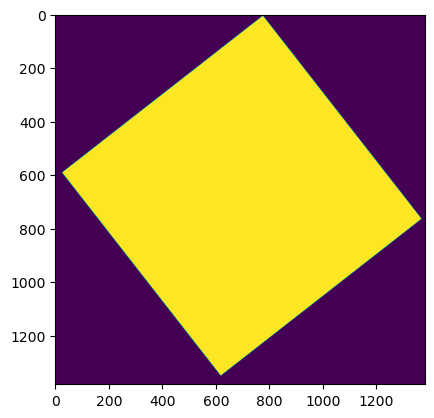

calculated boundary at frame 12


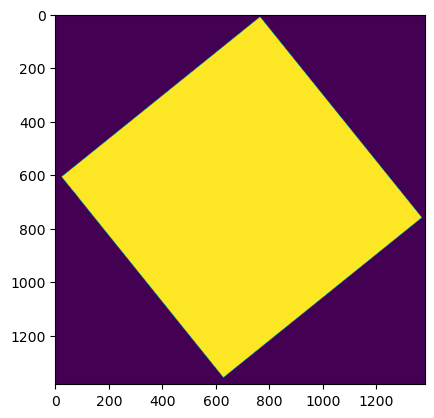

calculated boundary at frame 24


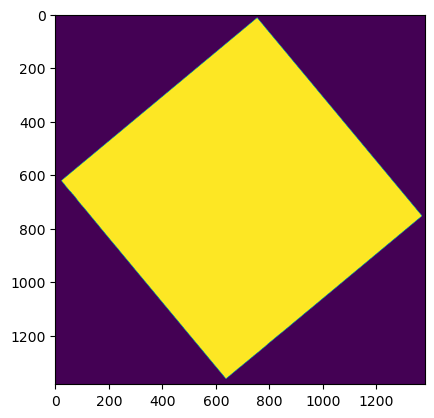

calculated boundary at frame 36


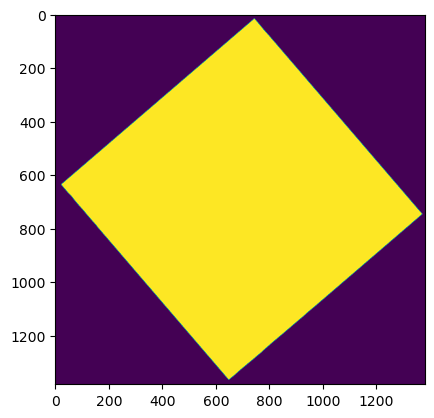

calculated boundary at frame 48


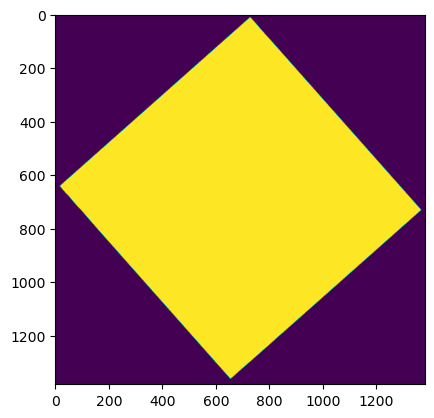

calculated boundary at frame 60


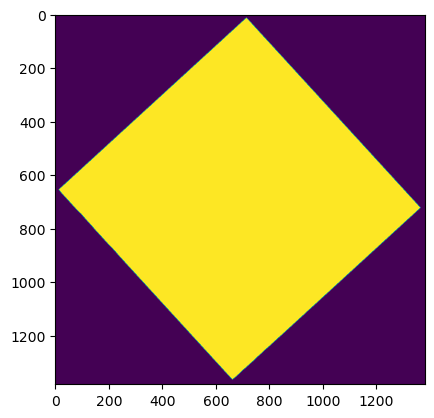

calculated boundary at frame 72


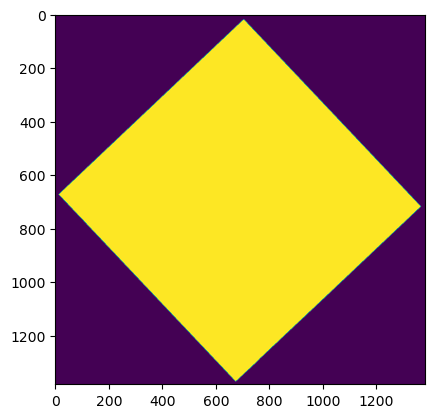

calculated boundary at frame 84


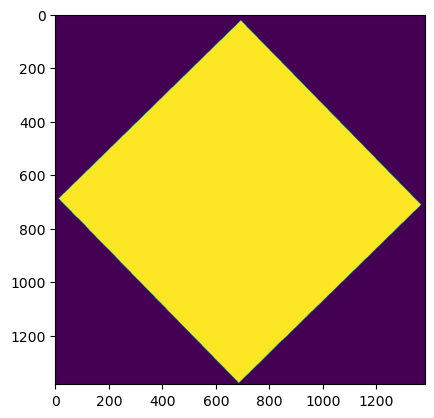

calculated boundary at frame 96


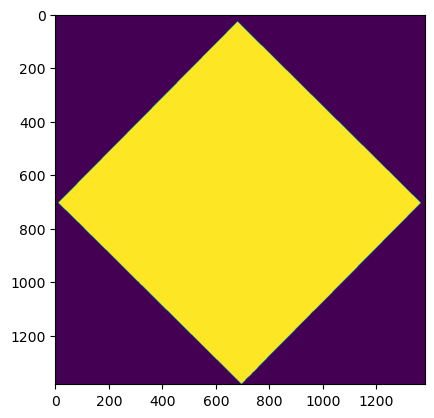

calculated boundary over folowing frames range(0, 100, 12)
Boundary
Blue=Outside, yellow=Inside


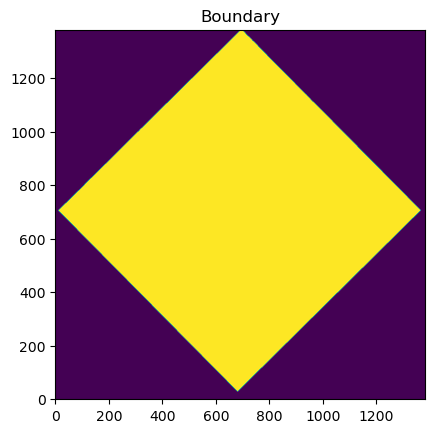

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
reload(un)


CaIR = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstCaIR.npy', 
    number_of_frames=maximum,
    time=time_list, name_of_line='CaIR21a', 
    thresh=[0, np.percentile(datacube(0), 99.5)],  
    boundary_methode='search_overlap', 
    boundary_arguments = {"error":0.01}, 
    with_stokes=True, 
    with_time=True, 
    alternative_datacube=datacube
    )

# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaIR.boundary


In [65]:
# CaIR.calculate__FOV_spect_over_time()
reload(un)

<module 'use_nessi3' from 'E:\\solar flares/data/2017-09-06\\use_nessi3.py'>

In [66]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaIR.shape=}')

the mean cadence is 21.575757575757613 seconds for this line!
CaIR.shape=(100, '??', 15, 1382, 1382)


The guessed filters are [[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]]


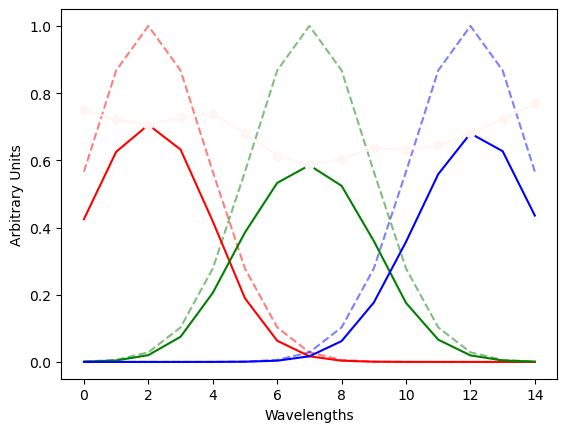

In [67]:
# %matplotlib inline
CaIR.update_filters(None)# [[3,2], [7,2], [11,2]]
CaIR.plot_filt(880,900)
plt.show()

In [68]:
# # %matplotlib widget
# print(f'the number of frames is {CaIR._number_of_frames}')
# for frame in range(0 ,CaIR._number_of_frames, 60):
#     # frame=0
#     CaIR.ccp_frame(frame,Show=False)
#     print(f'frame number {frame} at time {CaIR._time[frame]}')
#     plt.imshow(CaIR.current_ccp, origin='lower')
#     plt.imshow(CaIR.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

#     # plt.imshow(CaIR.boundary, origin='lower', alpha=0.2)
#     plt.show()
#     print(np.shape(CaIR.current_ccp))#,np.shape(CaIR.boundary))

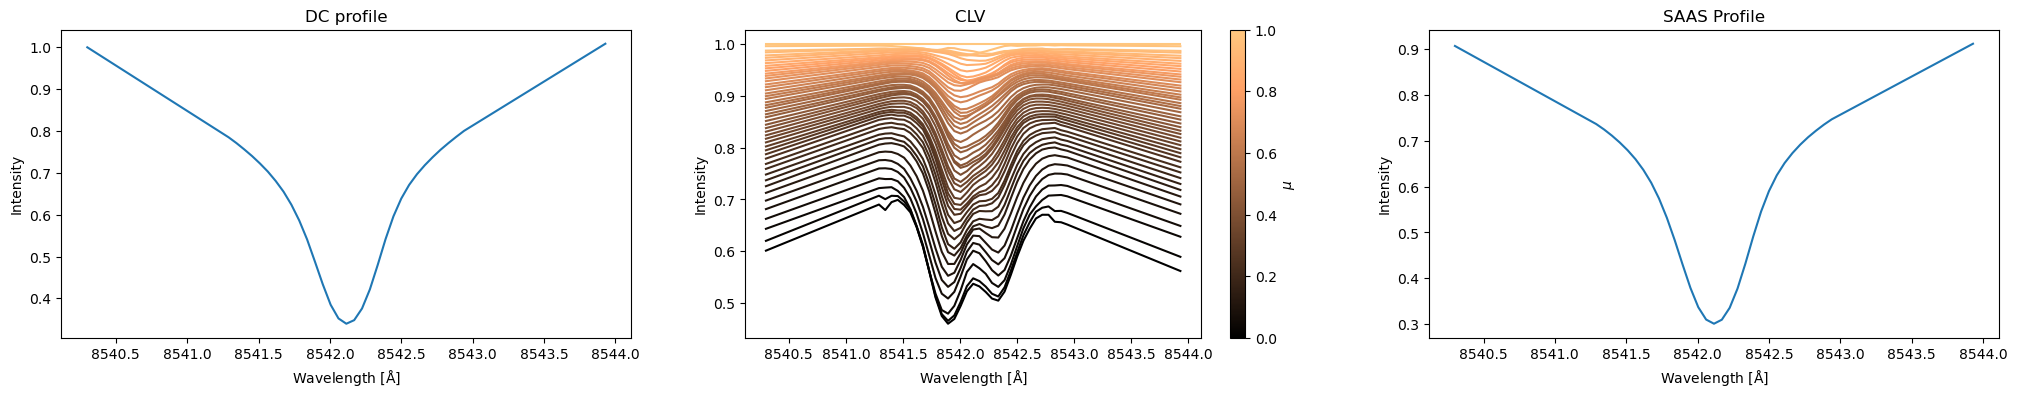

8542.114877954633 8542.114877954633


In [69]:
reload(un)
theor_CaIR = un.linestudier('E:/solar flares/data/2017-09-06/fits/8542_clv.fits', atlas=None, nr=101)
print(np.median(theor_CaIR.sst_wav), np.mean(theor_CaIR.sst_wav))

## Calculating the $\mu$ !!!!! 


In [70]:
CaIR.shape

(100, '??', 15, 1382, 1382)

In [71]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaIR.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass


SIMPLE  =                    T / Written by IDL:  Mon Sep 16 18:53:53 2024     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1382 / Number of positions along axis 1              
 NAXIS2  =                 1382 / Number of positions along axis 2              
 NAXIS3  =                   15 / Number of positions along axis 3              
 NAXIS4  =                    4 / Number of positions along axis 4              
 NAXIS5  =                  100 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2024-09-19T15:14:19' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-PRPARA1;PRPARA1,VAR-EXT-PRREF1;PRREF1,VAR-EXT-DATE-BEG;DATE&
'CONTINUE  '-BEG,VAR-EXT-DATE

In [72]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[0,0]

(array([[[[[ 104.33815138, -589.76908562],
           [ 186.0933514 , -589.76908562]],
 
          [[ 104.33815138, -508.0138856 ],
           [ 186.0933514 , -508.0138856 ]]],
 
 
         [[[ 104.33815138, -589.76908562],
           [ 186.0933514 , -589.76908562]],
 
          [[ 104.33815138, -508.0138856 ],
           [ 186.0933514 , -508.0138856 ]]],
 
 
         [[[ 104.33815138, -589.76908562],
           [ 186.0933514 , -589.76908562]],
 
          [[ 104.33815138, -508.0138856 ],
           [ 186.0933514 , -508.0138856 ]]],
 
 
         ...,
 
 
         [[[ 104.33815138, -589.76908562],
           [ 186.0933514 , -589.76908562]],
 
          [[ 104.33815138, -508.0138856 ],
           [ 186.0933514 , -508.0138856 ]]],
 
 
         [[[ 104.33815138, -589.76908562],
           [ 186.0933514 , -589.76908562]],
 
          [[ 104.33815138, -508.0138856 ],
           [ 186.0933514 , -508.0138856 ]]],
 
 
         [[[ 104.33815138, -589.76908562],
           [ 186.0933514 , -589.76

[ 107.74151135  189.49671137 -591.76724512 -510.01204509]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8041943150805951 for timeframe 50
Coundourplot succesfully saved.


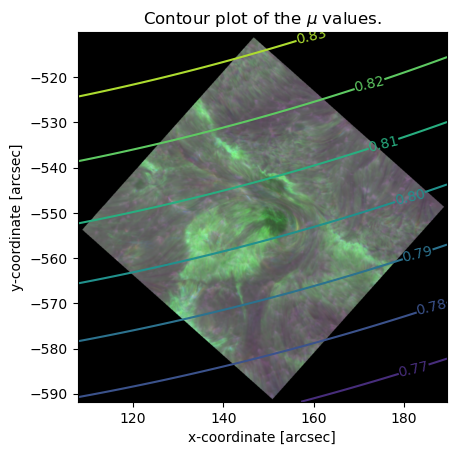

In [73]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu



fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], CaIR.shape[4])
y = np.linspace(fyp[0], fyp[1], CaIR.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaIR, save=True, save_name=CaIR.name_of_line, timeFrame=maximum//2)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


(139, 139) (139, 139) (138, 138)


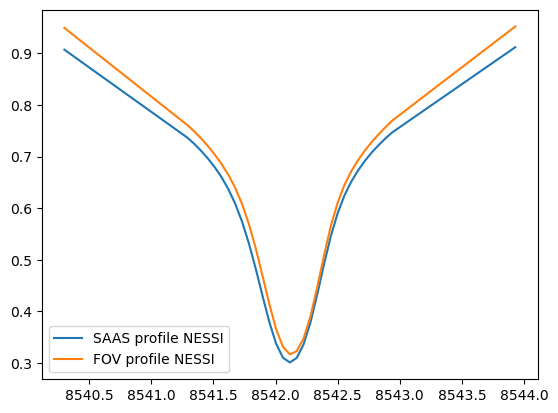

In [74]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_15032\1931987859.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')


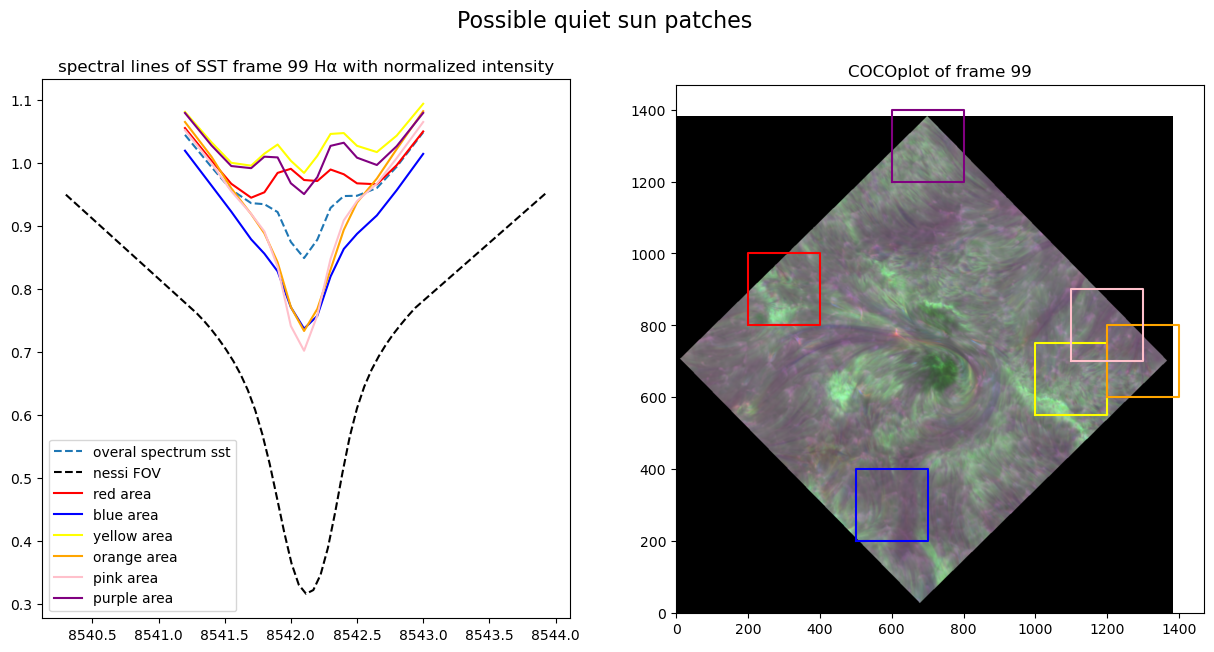

In [75]:
frame=99

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaIR.ccp_frame(frame,Show=False)
# xlim, ylim
X = [ [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1200,1400),(600, 800)],[(1100,1300),(700, 900)], [(600,800),(1200,1400)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.spectr_fov, '--', label='nessi FOV', color='black')

ax[1].imshow(CaIR.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaIR._wavel, CaIR.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [76]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (1200, 1400) and ylim: (600, 800)


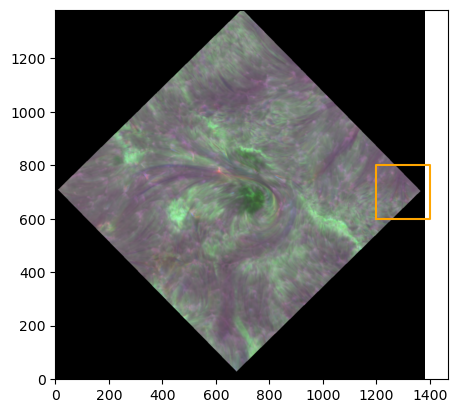

{'frame': 99, 'xlim': (1200, 1400), 'ylim': (600, 800), 'color': 'orange'}

In [77]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaIR.quiet_sun

The quiet sun is pick at x (184.13911136857917, -550.3568451048524) with average              mu 0.7964087442987874


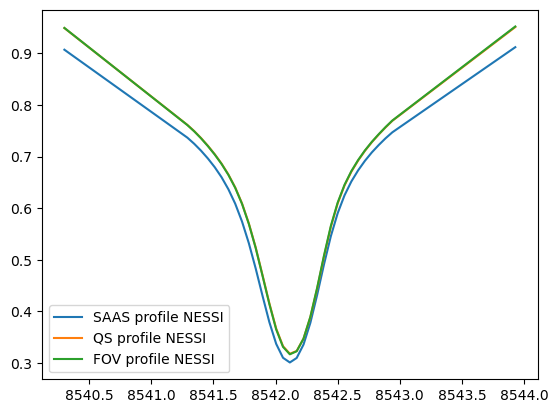

In [78]:
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim)


[8541.19998431 8541.39998431 8541.54998431 8541.69998431 8541.79998431
 8541.89998431 8541.99998431 8542.09998431 8542.19998431 8542.29998431
 8542.39998431 8542.49998431 8542.64998431 8542.79998431 8542.99998431] [1.06449807 1.00956547 0.95928591 0.91849989 0.8880536  0.8420822
 0.77126104 0.73318052 0.76811337 0.83042777 0.893484   0.93679684
 0.97485572 1.02157128 1.08162391] [0.77838765 0.73582214 0.69130765 0.62602992 0.55753913 0.465115
 0.37087854 0.3216369  0.33618515 0.40894696 0.51683303 0.60914469
 0.68643949 0.73453541 0.78027613]
[-0.01489365  1.50135783]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 995.2188124420911
        x: [-2.279e-02  1.474e+00]
      nit: 7
      jac: [ 7.629e-06 -7.629e-06]
 hess_inv: [[ 1.994e-05 -7.471e-07]
            [-7.471e-07  3.392e-05]]
     nfev: 33
     njev: 11


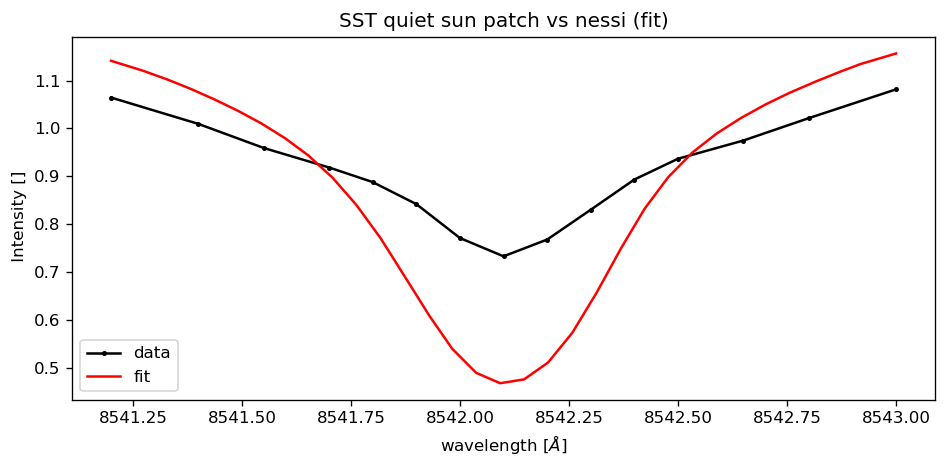

de p-waarde is  4.880902639558683e-11 
Chi^2 reduced= 76.55529326477624 
aantal vrijheidgraden= 13 
chi^2= 995.2188124420911
we behouden de fit tot op een betrouwbaarheidsniveau van  4.880902639558683e-11 
Oftewel verwerp als p-waarde <lpha-niveau 


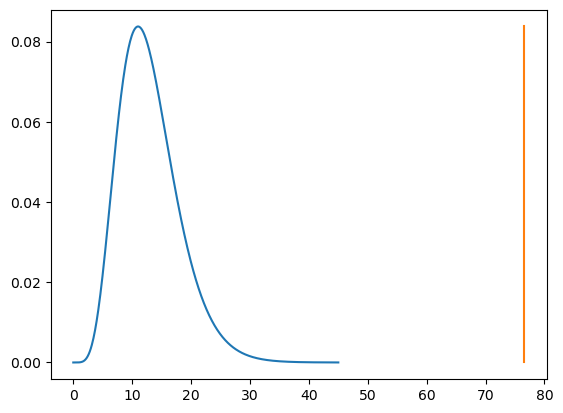

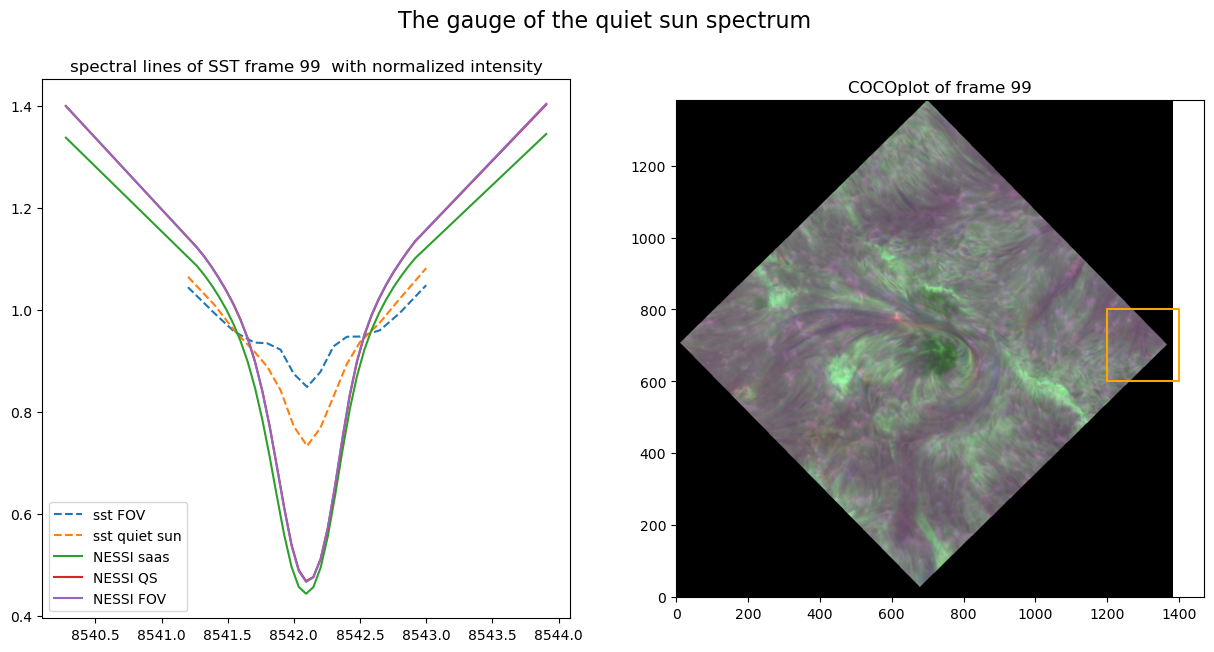

In [79]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [80]:
sst_data = CaIR
CaIR.shape

(100, '??', 15, 1382, 1382)

In [81]:
CaIR.calculate__FOV_spect_over_time()

In total 100 frames.
Now calculating frame:
99

In [82]:
sst_data.quiet_sun

{'frame': 99, 'xlim': (1200, 1400), 'ylim': (600, 800), 'color': 'orange'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [3] at time ['t=15:33:01 UT'].
The SST data runs from t=15:31:56 UT to t=16:07:32 UT.
The areafactor for THIS flare is 0.0011104073916234235 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 89.24%.


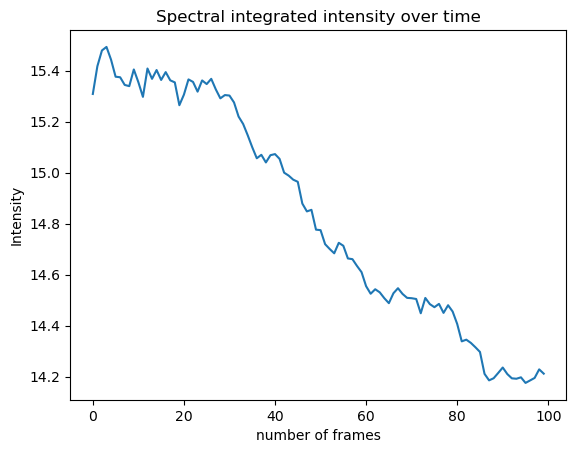

In [83]:
reload(un)
un.save_for_further_analysis(CaIR, theor_CaIR)


# Movie Making

Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, 15:31:56.86121, total number of frames: 100 


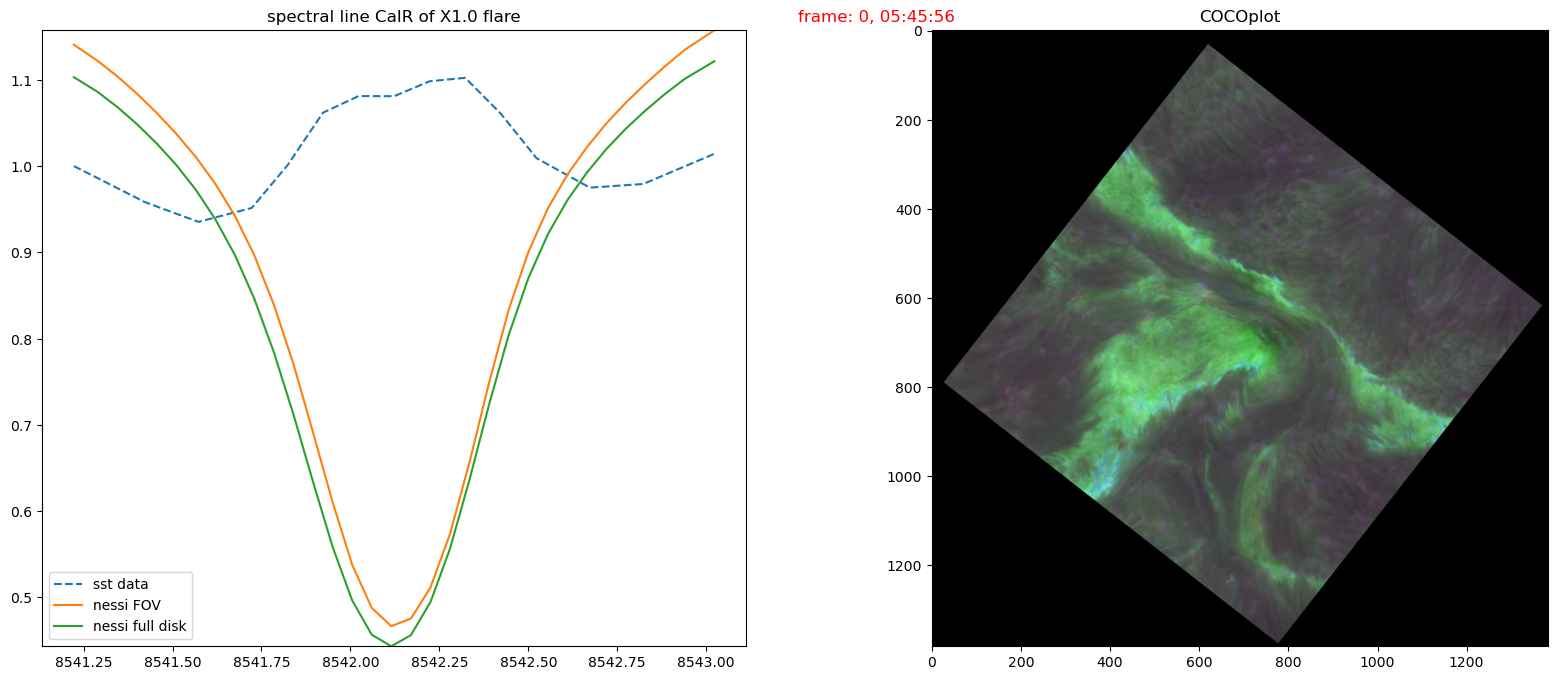

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 

In [84]:
# fill in here all arguments
theor_line = theor_CaIR
sst_data = CaIR
name_of_flare = "X1.0"
name_of_line = "CaIR"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)